In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import matplotlib.dates as dates

In [16]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2024-12-31')
raw

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2010-01-04    6.440332   86.026466    6.455078   86.072009    6.391280   
2010-01-05    6.451466   86.254173    6.487879   86.292130    6.417459   
2010-01-06    6.348846   86.314911    6.477045   86.527452    6.342225   
2010-01-07    6.337111   86.679237    6.379844   86.785508    6.291067   
2010-01-08    6.379241   86.967720    6.379843   87.005676    6.291368   
...                ...         ...         ...         ...         ...   
2024-12-23  254.989655  594.690002  255.369227  595.299988  253.171646   
2024-12-24  257.916443  601.299988  257.926411  601.340027  255.009620   
2024-12-26  258.735504  601.340027  259.814335  602.479980  257.347047   
2024-12-27  255.309296  595.010010  258.415896  597.780029  252.782075   
2024-12-30  251.923019  588.219971  253.221595  591.739990  250.474615   

Price                         Open                 Volume             
Ticker             SPY        AAPL         SPY       AAPL        SPY  
Date                                                                  
2010-01-04   84.644942    6.422878   85.297751  493729600  118944600  
2010-01-05   85.662092    6.458086   85.973318  601904800  111579900  
2010-01-06   86.102370    6.451465   86.170684  552160000  116074400  
2010-01-07   85.912566    6.372320   86.155471  477131200  131091100  
2010-01-08   86.276961    6.328684   86.451546  447610800  126402800  
...                ...         ...         ...        ...        ...  
2024-12-23  587.659973  254.490204  590.890015   40858800   57635800  
2024-12-24  595.469971  255.209412  596.059998   23234700   33160100  
2024-12-26  598.080017  257.906429  599.500000   27237100   41219100  
2024-12-27  590.760010  257.546826  597.539978   42355300   64969300  
2024-12-30  584.409973  251.952985  587.890015   35557500   56578800  

[3773 rows x 10 columns]

In [17]:
raw.columns


MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'SPY'),
            (  'High', 'AAPL'),
            (  'High',  'SPY'),
            (   'Low', 'AAPL'),
            (   'Low',  'SPY'),
            (  'Open', 'AAPL'),
            (  'Open',  'SPY'),
            ('Volume', 'AAPL'),
            ('Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [18]:
raw.iloc[:, ::2].columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [19]:
column = [col[0] for col in raw]
raw.columns= column

In [20]:
raw.iloc[:, ::2].columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [21]:
raw = raw.iloc[:, ::2]
raw

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440332,6.455078,6.391280,6.422878,493729600
2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000
2010-01-07,6.337111,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


<Axes: xlabel='Date'>

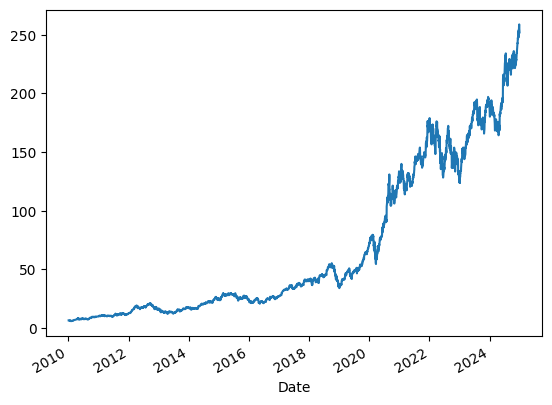

In [22]:
raw.Close.plot()

<Axes: xlabel='Date'>

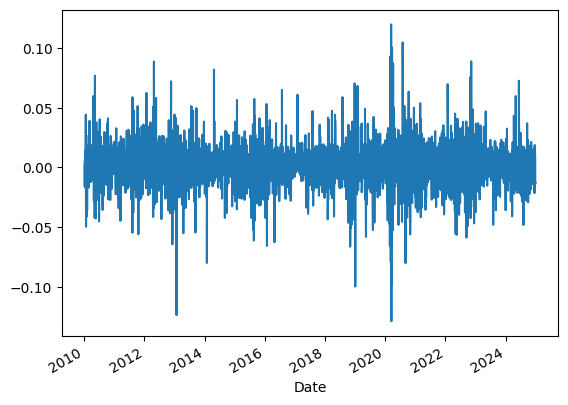

In [23]:
raw.pct_change().Close.plot()

In [24]:
def cumlative_returns(df, col):
    row = df[col]
    return (row.sub(row[0]).div(row[0]))

/tmp/ipykernel_783/2608156303.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (row.sub(row[0]).div(row[0]))


<Axes: xlabel='Date'>

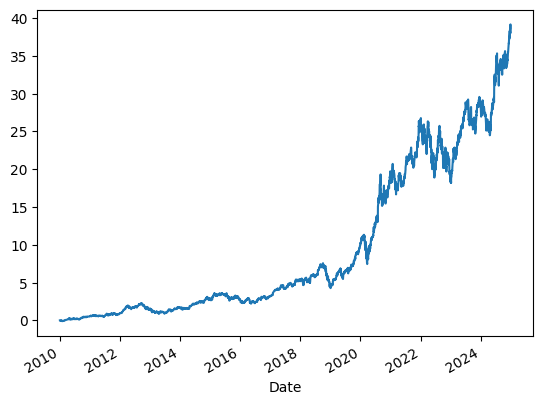

In [25]:
raw.pipe(cumlative_returns,'Close').plot()

In [26]:
raw.assign(cum_returns=lambda df:cumlative_returns(df, 'Close'))

/tmp/ipykernel_783/2608156303.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (row.sub(row[0]).div(row[0]))


,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,
2010-01-04,6.440332,6.455078,6.391280,6.422878,493729600,0.000000
2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800,0.001729
2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000,-0.014205
2010-01-07,6.337111,6.379844,6.291067,6.372320,477131200,-0.016027
2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800,-0.009486
...,...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,38.592623
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,39.047070
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,39.174247


In [27]:
def mybar(row, ax):
    ax.bar(row.index, row)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return row

/tmp/ipykernel_783/2608156303.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (row.sub(row[0]).div(row[0]))


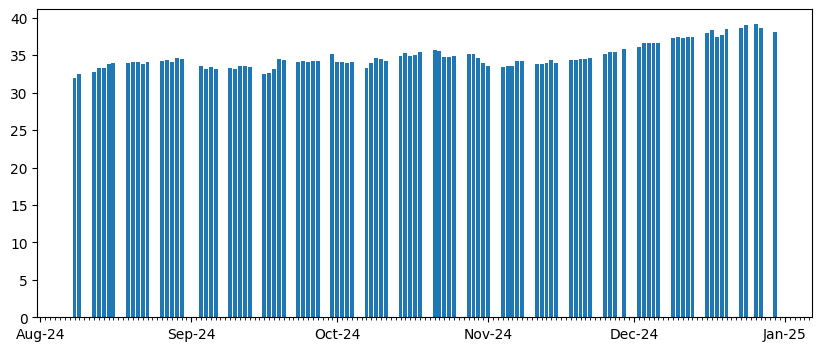

In [28]:
fig, ax = plt.subplots(figsize=(10,4))
_=raw.pipe(cumlative_returns,'Close').iloc[-100:].pipe(mybar, ax)

In [34]:
raw.assign(pct_change=raw.Close.pct_change()).resample('15D').std()

,Close,High,Low,Open,Volume,pct_change
Date,,,,,,
2010-01-04,0.077486,0.060719,0.085736,0.067722,7.028347e+07,0.010383
2010-01-19,0.225099,0.213341,0.196210,0.197255,4.361002e+08,0.030046
2010-02-03,0.112227,0.086464,0.104535,0.103936,1.455474e+08,0.017088
2010-02-18,0.135920,0.116794,0.140103,0.133100,9.844200e+07,0.011254
2010-03-05,0.073733,0.074226,0.095594,0.109105,1.951401e+08,0.014002
...,...,...,...,...,...,...
2024-10-17,3.032634,2.188820,2.814660,2.163469,9.911069e+06,0.011247
2024-11-01,2.107429,1.932082,2.231160,2.184957,9.441772e+06,0.011190
2024-11-16,3.541426,3.092375,3.677979,3.471352,1.823994e+07,0.005856


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

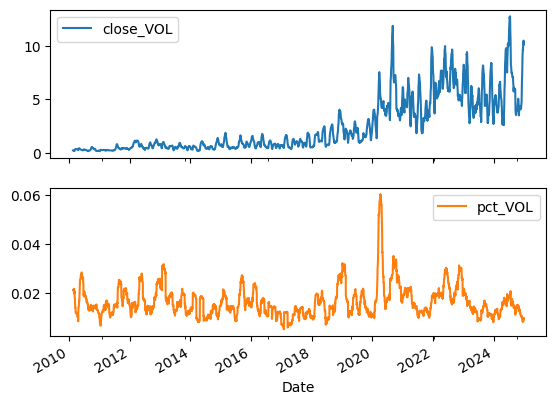

In [37]:
raw.assign(close_VOL=raw.Close.rolling(30).std(), pct_VOL=raw.Close.pct_change().rolling(30).std()).iloc[:, -2:].plot(subplots=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

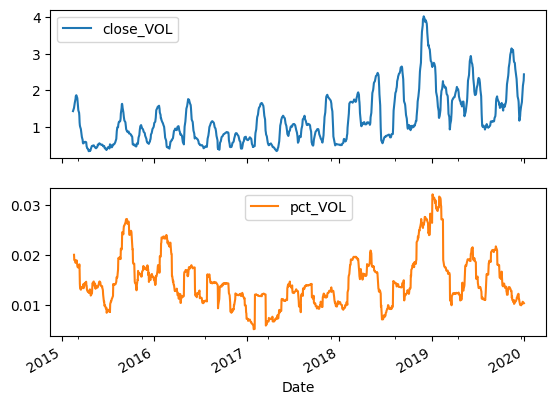

In [40]:
raw.assign(close_VOL=raw.Close['2015-01-01': '2019-12-31'].rolling(window=30,min_periods=30).std(), pct_VOL=raw.Close['2015-01-01': '2019-12-31'].pct_change().rolling(window=30,min_periods=30).std()).iloc[:, -2:].plot(subplots=True)